<h1 style="background-color:Green;font-size:36pt;color:white">K Nearest Neighbor</h1>

## Giusseppe Benito Bervis Quintero
### León, Nicaragua - 2022

# Importing needed packages

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# Uploading packages for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot']) # optional: for ggplot-like style

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

# About the dataset

A telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows: 
1. Basic Service 
2. E-Service 
3. Plus Service 
4. Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

# Downloading Data

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')

# Take a look at the dataset
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


# Exploring Data

Displaying the datatypes of the columns

In [3]:
df.dtypes

region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

All is well, no changes are required

Checking the number of rows and columns

In [4]:
df.shape

(1000, 12)

The dataset has 1000 rows and 12 features.

Checking missing values

In [5]:
df.isnull().sum().sum()

0

There is not any missing value in the dataset.

Let’s see how many of each class is in our dataset

In [6]:
classes = ['Basic Service', 'E-Service', 'Plus Service',
           'Total Service']

# Counting number of costumers by every class
# Sorting indexes
Df_ = df['custcat'].value_counts().sort_index()

# Changing indexes
Df_.index = classes

Df_

Basic Service    266
E-Service        217
Plus Service     281
Total Service    236
Name: custcat, dtype: int64

# Feature set

Let's define feature sets, X:

In [7]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

Converting Panda data frame to a Numpy array, tu use scikit_learn library.

In [8]:
# Predictor features
X = df[['region', 'tenure', 'age', 'marital', 'address', 
        'income', 'ed', 'employ', 'retire', 'gender', 
        'reside', 'custcat']].values

# Response feature
Y = df['custcat'].values

# Normalizing the data
Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:

In [9]:
XNorm = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
XNorm[0:2]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158,  1.35119935]])

## Creating train and test dataset

In [10]:
# Splitting the data into train and test sets
# Taking 80% as trainning set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (800, 12) (800,)
Test set: (200, 12) (200,)


# Classification

## Appliying K nearest neighbor (KNN)

How can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k = 1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.

The best accuracy was 0.36 with k = 7


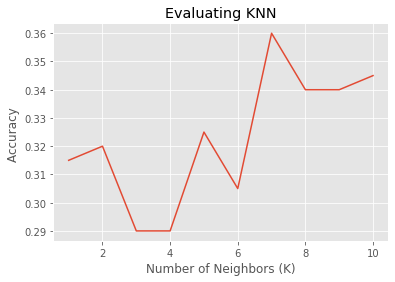

In [11]:
# Number or Ks
Ks = 10

# Array to save accuracy of every K
accuracy = np.zeros((Ks))

for k in range(1, Ks + 1):
    # Trainning the model
    KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train)
    
    # Predicting
    y_hat = KNN.predict(X_test)
    
    # Saving accuracy - Jaccard similarity
    accuracy[k - 1] = metrics.accuracy_score(Y_test, y_hat)

# Printing the best K
print(f'The best accuracy was {accuracy.max()} with k = {accuracy.argmax() + 1}')

# Plotting accuracy
plt.plot(range(1,Ks+1), accuracy, label = 'Accuracy')
# Labels
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy ')
plt.title('Evaluating KNN')
plt.show()